# **Chapter 3. Python 을 활용한 데이터 전처리** 





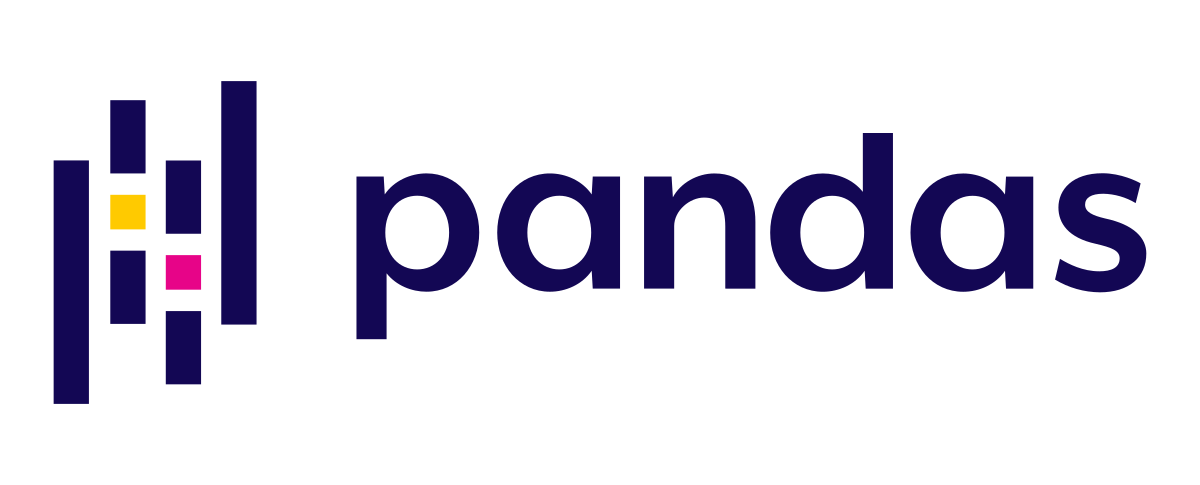


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> **3-9. 데이터 합치기 (Join 과 Merge, Concat)** <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-9. 데이터 합치기 (Join 과 Merge)

In [ ]:
# 라이브러리 임포트
import pandas as pd

In [ ]:
# 실습 파일 로딩 (아이돌 프로필)
df = pd.read_csv('https://bit.ly/3gRXTfD')

In [52]:
# 상위 5개 정보 사용
df1 = df.iloc[:,1:11].head(5)
df2 = df.loc[3:10, ['Korean Name', 'Instagram']]

In [53]:
df1

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight
0,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160,44
1,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158,43
2,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163,50
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45


In [54]:
df2

,Korean Name,Instagram
3,김효연,watasiwahyo
4,권유리,yulyulk
5,최수영,hotsootuff
6,임윤아,yoona__lim
7,서주현,seojuhyun_s
8,제시카 정,jessica.syj
9,이채린,chaelincl
10,박봄,haroobommi


> ###  **3-9-1. Join**


> **두개의 데이터 프레임(DataFrame) 을 겹치는 "인덱스(Index)" 기준으로 합치는 것**
> - Join 에는 **'`Inner Join`', '`Left Join`', '`Right Join`', '`Outer Join`', 4가지 방식이 있습니다.**
> - 기본 사용법
    - **`df1.join(df2, on='키 인덱스', how='조인 방법', sort='정렬 여부')`**


> <br>
>
> 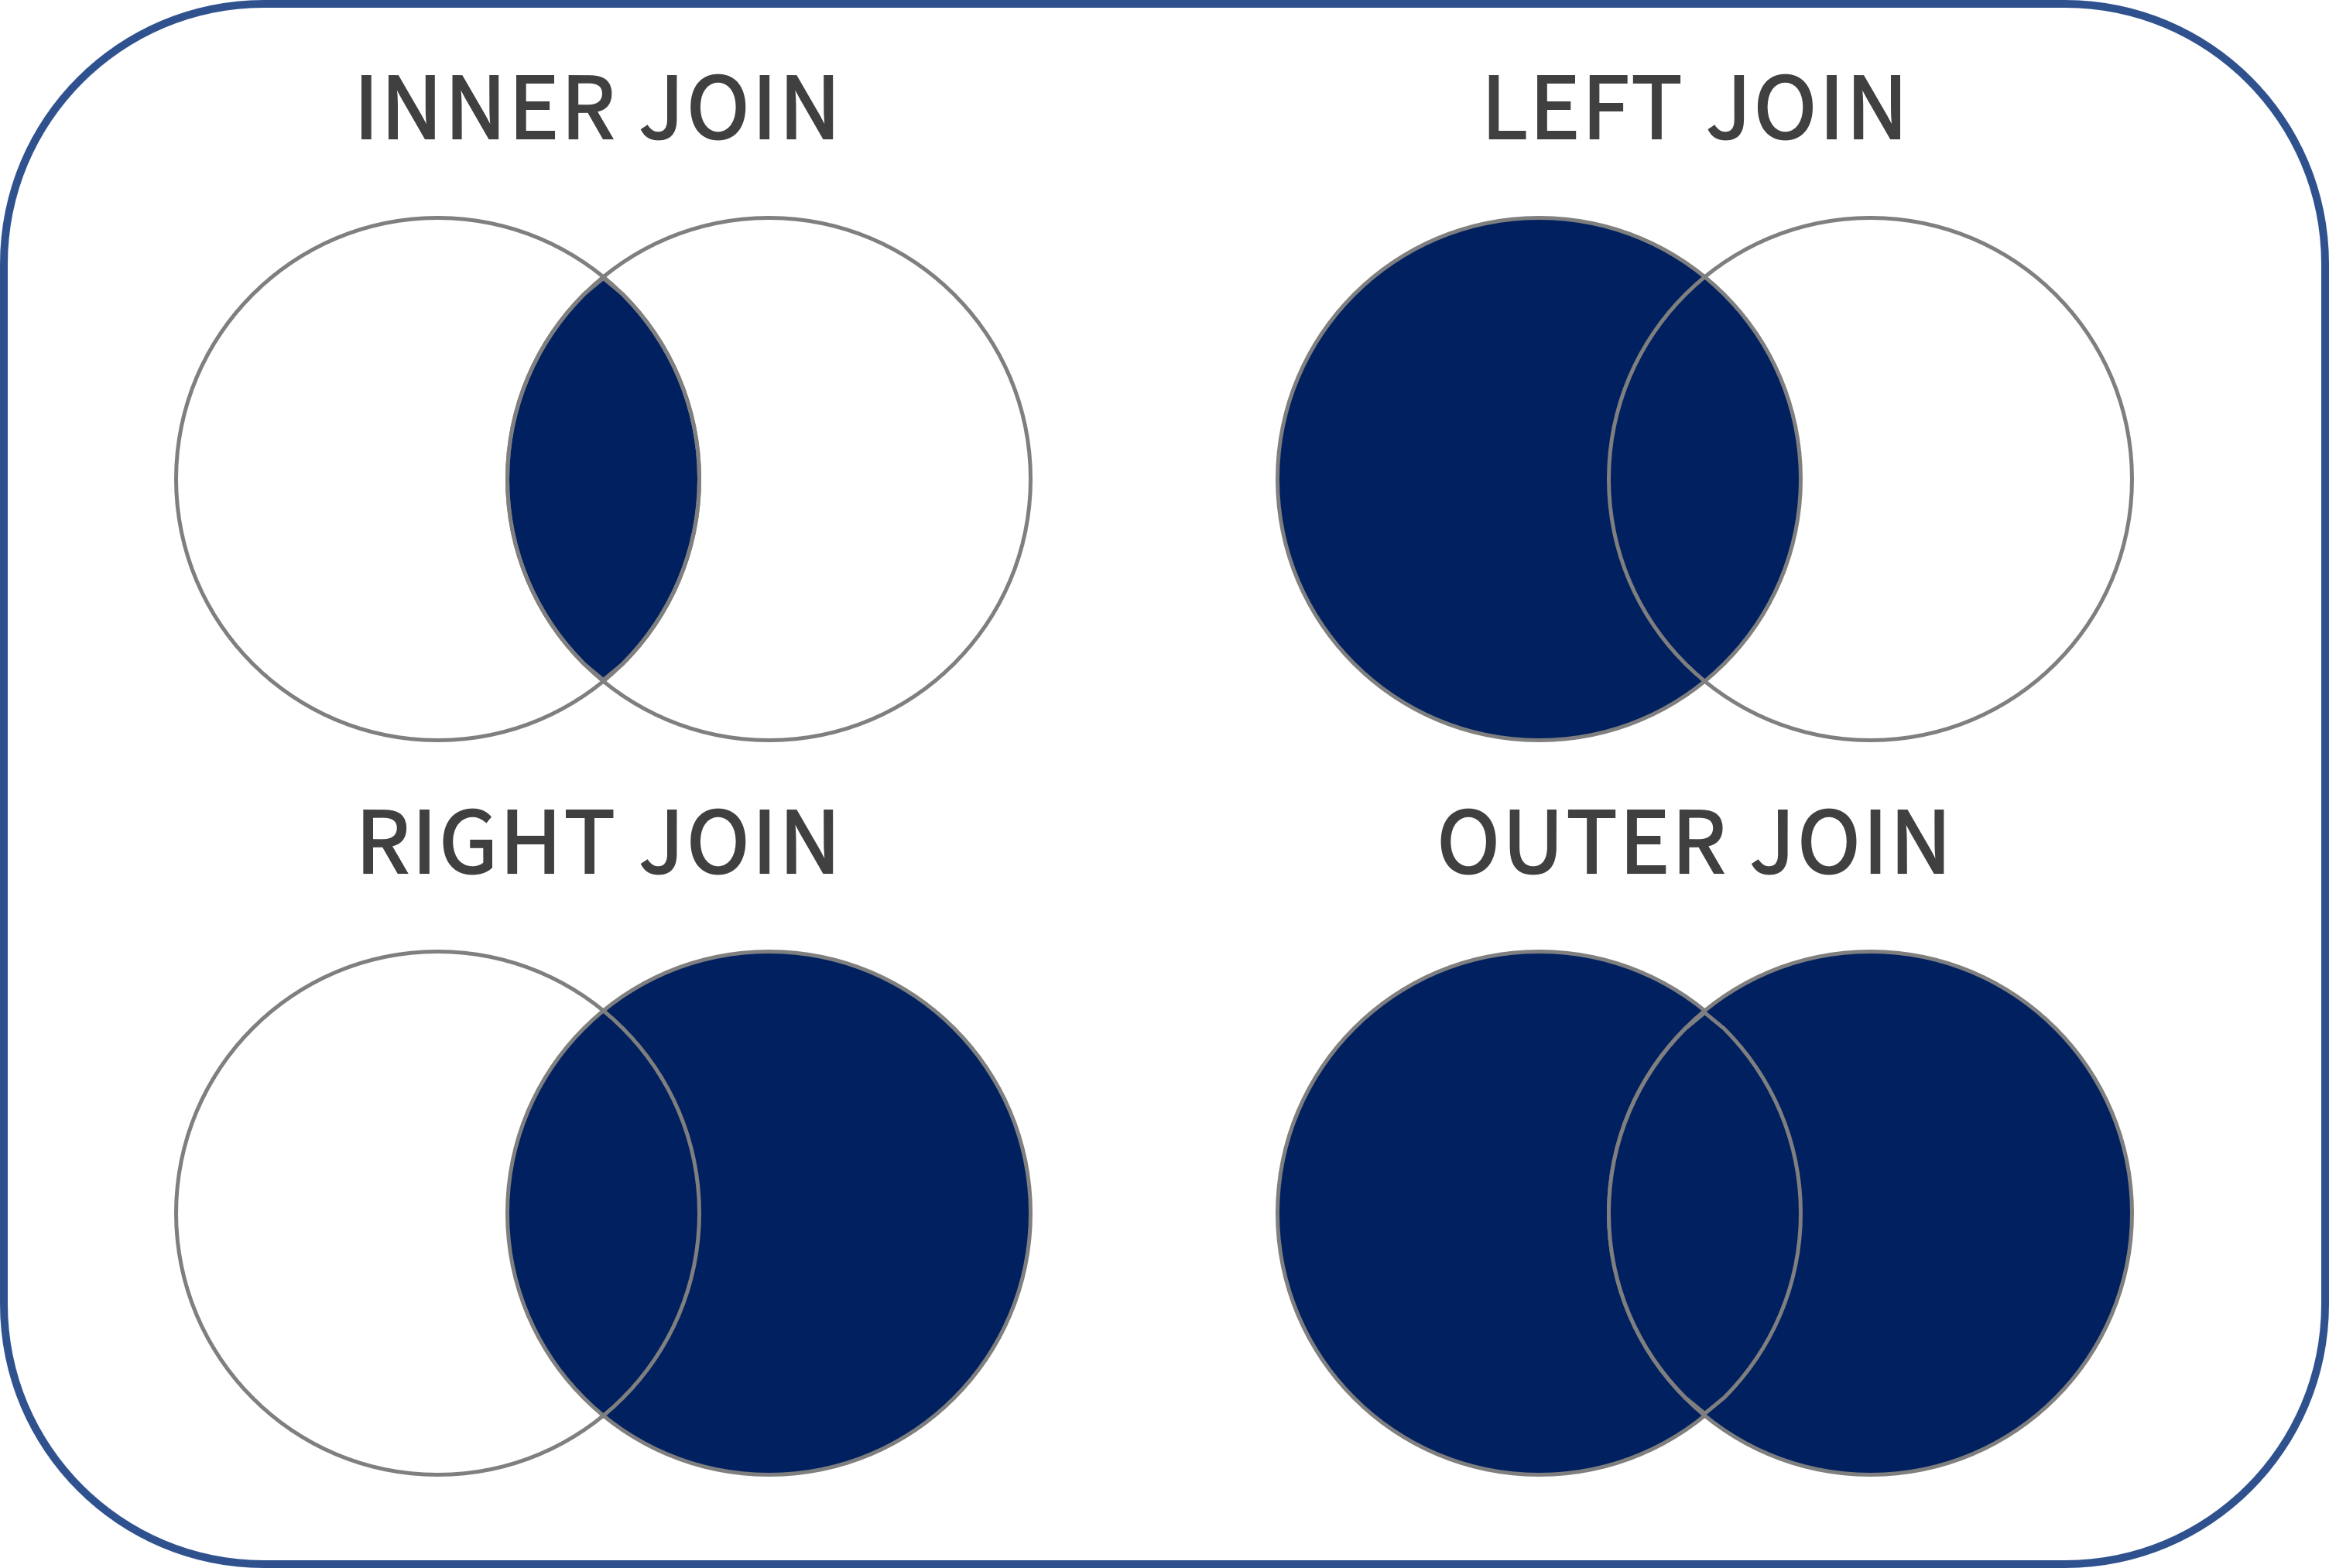

> 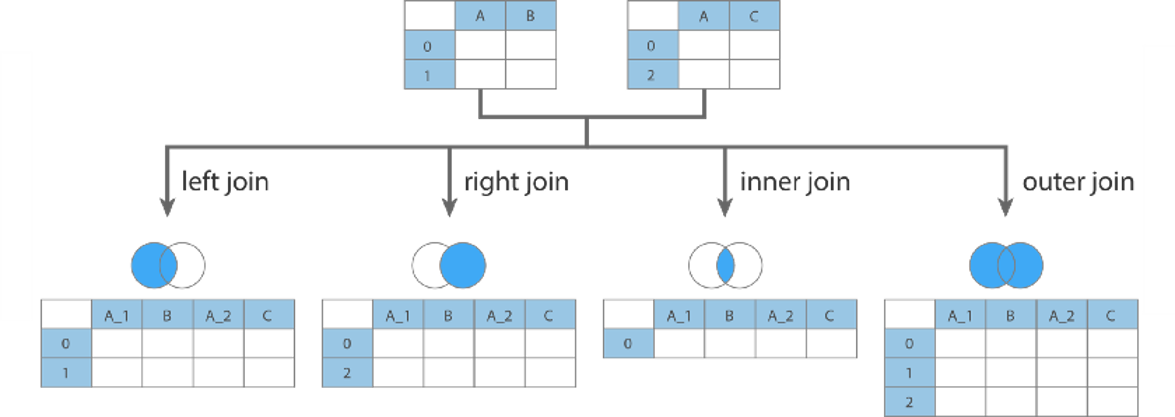

In [55]:
df1

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight
0,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160,44
1,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158,43
2,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163,50
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45


In [56]:
df2

,Korean Name,Instagram
3,김효연,watasiwahyo
4,권유리,yulyulk
5,최수영,hotsootuff
6,임윤아,yoona__lim
7,서주현,seojuhyun_s
8,제시카 정,jessica.syj
9,이채린,chaelincl
10,박봄,haroobommi


> **`join` 을 사용하기 위해서는, 키로 지정할 열을 "인덱스화" 시켜주어야 합니다.**
> - `set_index('키로 지정할 열')` 사용법

> **1. [join] Left Join**

In [57]:
# left join
# df1.join(df2, on='키 인덱스', how='조인 방법', sort='정렬 여부')
# df1.join(df2, on='Korean Name', how='left') # 에러 발생!
df1.join(df2.set_index('Korean Name'), on='Korean Name', how='left')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
0,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160,44,NaN
1,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158,43,NaN
2,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163,50,NaN
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,watasiwahyo
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,yulyulk


> **2. [join] Right Join**

In [58]:
df1.join(df2.set_index('Korean Name'), on='Korean Name', how='right')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
3.0,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158.0,48.0,watasiwahyo
4.0,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167.0,45.0,yulyulk
NaN,NaN,NaN,최수영,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hotsootuff
NaN,NaN,NaN,임윤아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yoona__lim
NaN,NaN,NaN,서주현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seojuhyun_s
NaN,NaN,NaN,제시카 정,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jessica.syj
NaN,NaN,NaN,이채린,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chaelincl
NaN,NaN,NaN,박봄,NaN,NaN,NaN,NaN,NaN,NaN,NaN,haroobommi


> **3. [join] Inner Join**

In [59]:
df1.join(df2.set_index('Korean Name'), on='Korean Name', how='inner')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,watasiwahyo
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,yulyulk


> **4. [join] Outer Join**

In [60]:
df1.join(df2.set_index('Korean Name'), on='Korean Name', how='outer')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
0.0,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160.0,44.0,NaN
1.0,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158.0,43.0,NaN
2.0,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163.0,50.0,NaN
3.0,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158.0,48.0,watasiwahyo
4.0,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167.0,45.0,yulyulk
NaN,NaN,NaN,최수영,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hotsootuff
NaN,NaN,NaN,임윤아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yoona__lim
NaN,NaN,NaN,서주현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seojuhyun_s
NaN,NaN,NaN,제시카 정,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jessica.syj
NaN,NaN,NaN,이채린,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chaelincl


> ###  **3-9-2. Merge(추천)**


> **두개의 데이터 프레임(DataFrame) 을 겹치는 "값(Value)" 기준으로 합치는 것**
> - Merge 를 사용하면, **Join 에서 겹치는 인덱스를 따로 지정해 주어야 하는 작업이 없어집니다!**
> - 단지 **두개 이상의 겹치는 컬럼만** 있으면 됩니다.
> - Join 과 똑같이 **'`Inner Merge`', '`Left Merge`', '`Right Merge`', '`Outer Merge`', 4가지 방식이 있습니다.**
> - 기본 사용법
    - **`pd.merge(df1, df2, on='키 컬럼', how='조인 방법', sort='정렬 여부')`**


> **1. [merge] Left Merge**

In [61]:
pd.merge(df1, df2, on='Korean Name', how='left')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
0,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160,44,NaN
1,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158,43,NaN
2,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163,50,NaN
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,watasiwahyo
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,yulyulk


> **2. [merge] Right Merge**

In [62]:
pd.merge(df1, df2, on='Korean Name', how='right')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
0,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158.0,48.0,watasiwahyo
1,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167.0,45.0,yulyulk
2,NaN,NaN,최수영,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hotsootuff
3,NaN,NaN,임윤아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yoona__lim
4,NaN,NaN,서주현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seojuhyun_s
5,NaN,NaN,제시카 정,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jessica.syj
6,NaN,NaN,이채린,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chaelincl
7,NaN,NaN,박봄,NaN,NaN,NaN,NaN,NaN,NaN,NaN,haroobommi


> **3. [merge] Inner Merge**

In [63]:
pd.merge(df1, df2, on='Korean Name', how='inner')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
0,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,watasiwahyo
1,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,yulyulk


> **4. [merge] Outer Merge**

In [64]:
pd.merge(df1, df2, on='Korean Name', how='outer')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
0,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160.0,44.0,NaN
1,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158.0,43.0,NaN
2,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163.0,50.0,NaN
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158.0,48.0,watasiwahyo
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167.0,45.0,yulyulk
5,NaN,NaN,최수영,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hotsootuff
6,NaN,NaN,임윤아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yoona__lim
7,NaN,NaN,서주현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seojuhyun_s
8,NaN,NaN,제시카 정,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jessica.syj
9,NaN,NaN,이채린,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chaelincl


> ###  **3-9-3. Concat**


> **두개의 데이터 프레임(DataFrame) 을 단순히 붙이는 방법**
> - 위의 Join, Merge 개념과 **다른** 개념!
> - `concat` 은 행이나 열 방향으로 **데이터 프레임을 붙일 수 있습니다.**
> - 행 방향 붙이기 (axis=0), 열 방향 붙이기 (aixs=1)
> - 기본 사용법
    - **`pd.concat([df1, df2], axis='붙이는 방향')`**

> **행(row) 방향 데이터 붙이기**

In [65]:
pd.concat([df1,df2], axis=0)

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Instagram
0,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160.0,44.0,NaN
1,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158.0,43.0,NaN
2,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163.0,50.0,NaN
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158.0,48.0,NaN
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167.0,45.0,NaN
3,NaN,NaN,김효연,NaN,NaN,NaN,NaN,NaN,NaN,NaN,watasiwahyo
4,NaN,NaN,권유리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yulyulk
5,NaN,NaN,최수영,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hotsootuff
6,NaN,NaN,임윤아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yoona__lim
7,NaN,NaN,서주현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seojuhyun_s


> **열(column) 방향 데이터 붙이기**

In [66]:
pd.concat([df1,df2], axis=1)

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Korean Name,Instagram
0,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160.0,44.0,NaN,NaN
1,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158.0,43.0,NaN,NaN
2,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163.0,50.0,NaN,NaN
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158.0,48.0,김효연,watasiwahyo
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167.0,45.0,권유리,yulyulk
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,최수영,hotsootuff
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,임윤아,yoona__lim
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서주현,seojuhyun_s
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,제시카 정,jessica.syj
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,이채린,chaelincl


> **겹치는 값만 붙이기 (join 활용)**

In [67]:
pd.concat([df1,df2], axis=1, join='inner')

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Korean Name,Instagram
3,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,김효연,watasiwahyo
4,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,권유리,yulyulk
